Exponential

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor):
    """
    Computes stiffness values based on an exponential growth function.

    Parameters:
    - stiffness_start: Initial stiffness value.
    - stiffness_end: Maximum stiffness value.
    - total_episodes: Number of episodes for training.
    - growth_factor: Controls the growth rate (higher = faster increase).

    Returns:
    - episodes: Array of episode numbers.
    - stiffness_values: Array of stiffness values for each episode.
    """
    episodes = np.arange(total_episodes)
    exponent = growth_factor * episodes
    stiffness_values = stiffness_start + (
        (stiffness_end - stiffness_start) * (np.exp(exponent) - 1) / (np.exp(growth_factor * total_episodes) - 1)
    )
    return episodes, stiffness_values

# Parameters
stiffness_start = 1000
stiffness_end = 10000
total_episodes = 100
growth_factors = [0.005, 0.01, 0.02, 0.05]  # Different growth factors for comparison

# Plot Exponential Growth
plt.figure(figsize=(10, 5))
for growth_factor in growth_factors:
    episodes, stiffness_values = exponential_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor)
    plt.plot(episodes, stiffness_values, label=f'Growth Factor {growth_factor}')

plt.xlabel('Episode')
plt.ylabel('Stiffness Value')
plt.title('Exponential Growth of Stiffness')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logarithmic_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor):
    """
    Computes stiffness values based on a logarithmic growth function.

    Parameters:
    - stiffness_start: Initial stiffness value.
    - stiffness_end: Maximum stiffness value.
    - total_episodes: Number of episodes for training.
    - growth_factor: Controls the growth rate (higher = faster initial increase).

    Returns:
    - episodes: Array of episode numbers.
    - stiffness_values: Array of stiffness values for each episode.
    """
    episodes = np.arange(total_episodes)
    progress = episodes / total_episodes
    adjusted_progress = 1 - np.exp(-growth_factor * progress)
    stiffness_values = stiffness_start + (stiffness_end - stiffness_start) * adjusted_progress
    return episodes, stiffness_values

# Parameters
stiffness_start = 1000
stiffness_end = 10000
total_episodes = 100
growth_factors = [2, 5, 10, 15]  # Different growth factors for comparison

# Plot Logarithmic Growth
plt.figure(figsize=(10, 5))
for growth_factor in growth_factors:
    episodes, stiffness_values = logarithmic_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor)
    plt.plot(episodes, stiffness_values, label=f'Growth Factor {growth_factor}')

plt.xlabel('Episode')
plt.ylabel('Stiffness Value')
plt.title('Logarithmic Growth of Stiffness')
plt.legend()
plt.grid(True)
plt.show()


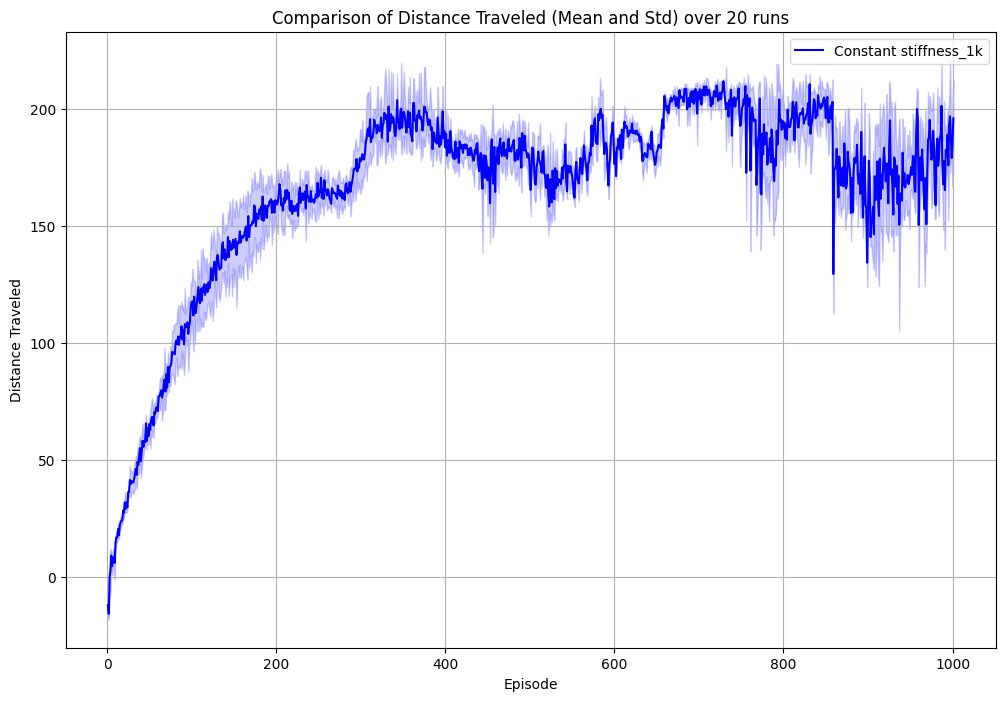

In [4]:
# Load all distance histories for both groups
#C:\Users\User\Desktop\New folder\data\Exponential\distance\distance_history_seed_1.npy
import numpy as np
import matplotlib.pyplot as plt
dist_file = [fr'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May19_linear_30k-40k_constant_5e-04_PPO_parallel_test\distance\displacement_history_seed_{seed_value}.npy' for seed_value in range(100, 104)]  # Adjust filenames if necessary
group1_data = [np.load(file) for file in dist_file]

# Convert to arrays for easier computation
group1_data = np.array(group1_data)

# Compute mean and std for each episode
group1_mean = group1_data.mean(axis=0)
group1_std = group1_data.std(axis=0)


# Plotting
plt.figure(figsize=(12, 8))

# Group 1: Constant Tendons _0k

episodes = np.arange(1, group1_mean.shape[0] + 1)
plt.plot(episodes, group1_mean, label="Constant stiffness_1k", color="blue", linestyle="-")
plt.fill_between(episodes, group1_mean - group1_std, group1_mean + group1_std, color="blue", alpha=0.2) # label="Constant Tendons (Std)")

# Formatting the plot
plt.title("Comparison of Distance Traveled (Mean and Std) over 20 runs")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()


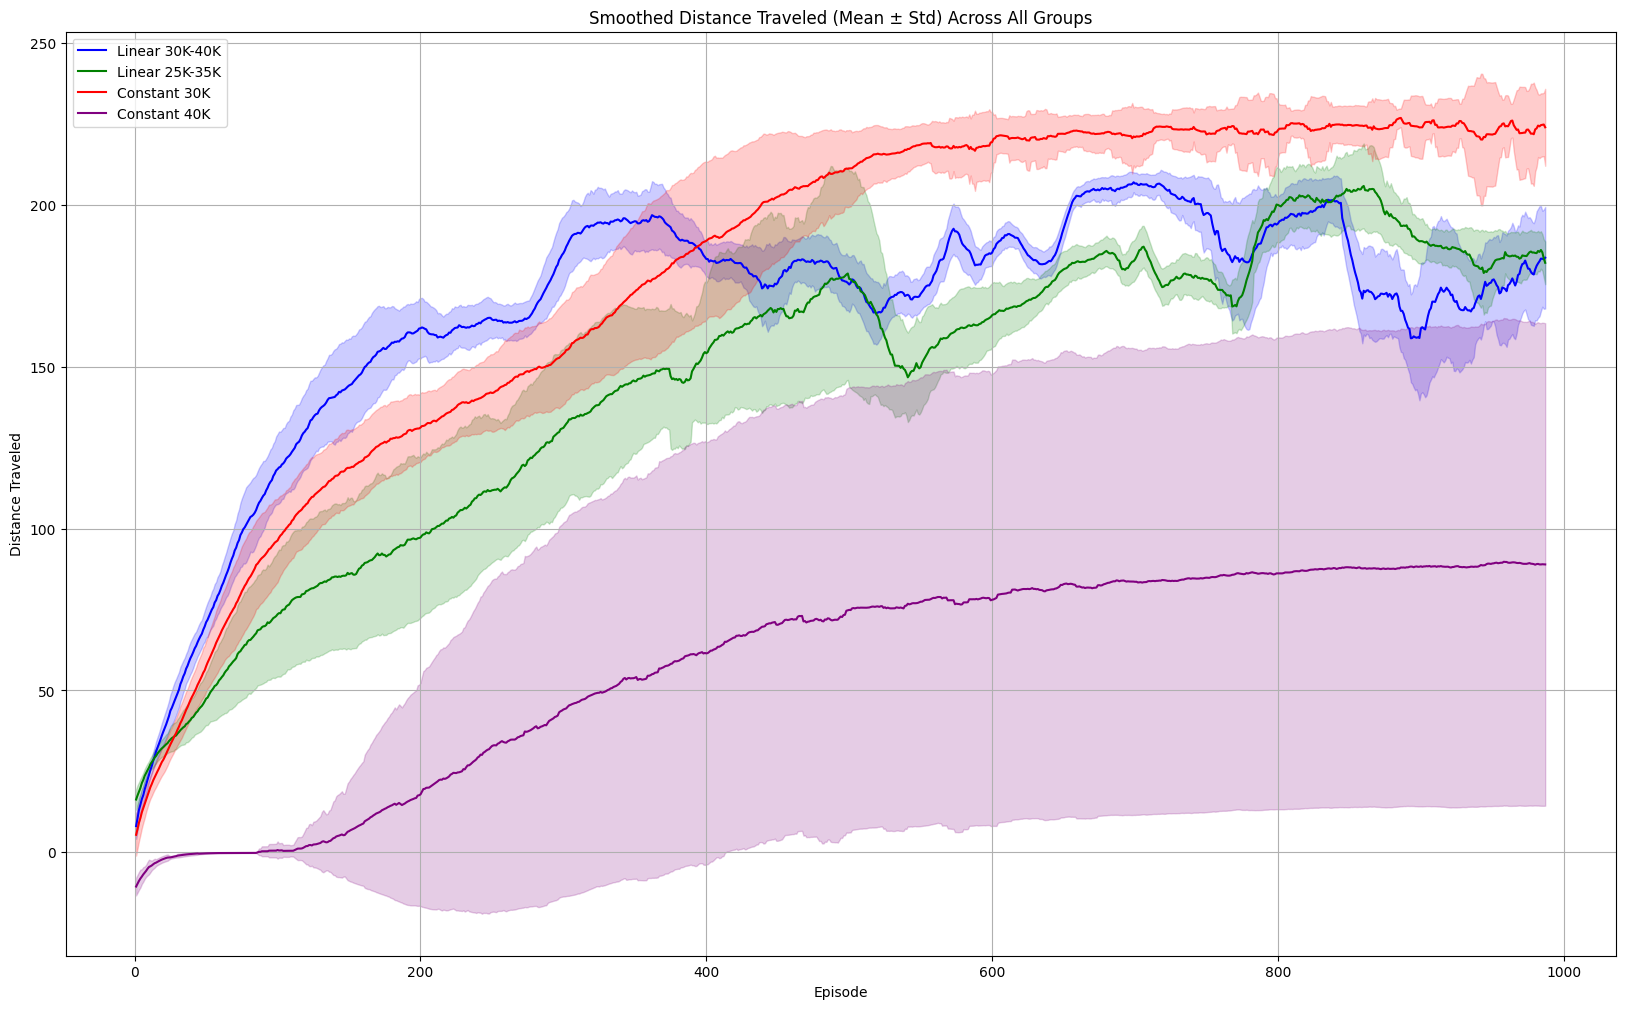

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define your groups: folder name and seed range
groups = {
    "Linear 30K-40K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May19_linear_30k-40k_constant_5e-04_PPO_parallel_test\distance",
    "Linear 25K-35K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May20_linear_25k-35k_constant_5e-04_PPO_parallel_test\distance",
    "Constant 30K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant30k_PPO\distance",
    "Constant 40K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant40k_PPO\distance",
}

# Set corresponding seeds for each group
group_seeds = {
    "Linear 30K-40K": range(100, 104),
    "Linear 25K-35K":  range(100, 104),# Change these based on your seed filenames
    "Constant 30K": range(100, 110),
    "Constant 40K": range(100,110),
}

#
# Colors for plotting
colors = ['blue', 'green', 'red', 'purple']

# Smoothing window size
window_size = 15

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []
    for seed in seeds:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            data_list.append(np.load(file_path))
        else:
            print(f"Warning: {file_path} not found.")
    
    if data_list:
        group_data = np.array(data_list)
        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        # Apply smoothing
        smoothed_mean = moving_average(group_mean, window_size)
        smoothed_std = moving_average(group_std, window_size)

        # Adjust x-axis to match smoothed data
        episodes = np.arange(1, len(smoothed_mean) + 1)

        plt.plot(episodes, smoothed_mean, label=label, color=colors[idx], linestyle='-')
        plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color=colors[idx], alpha=0.2)
    else:
        print(f"No data loaded for {label}.")

# Final plot formatting
plt.title("Smoothed Distance Traveled (Mean ± Std) Across All Groups")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()

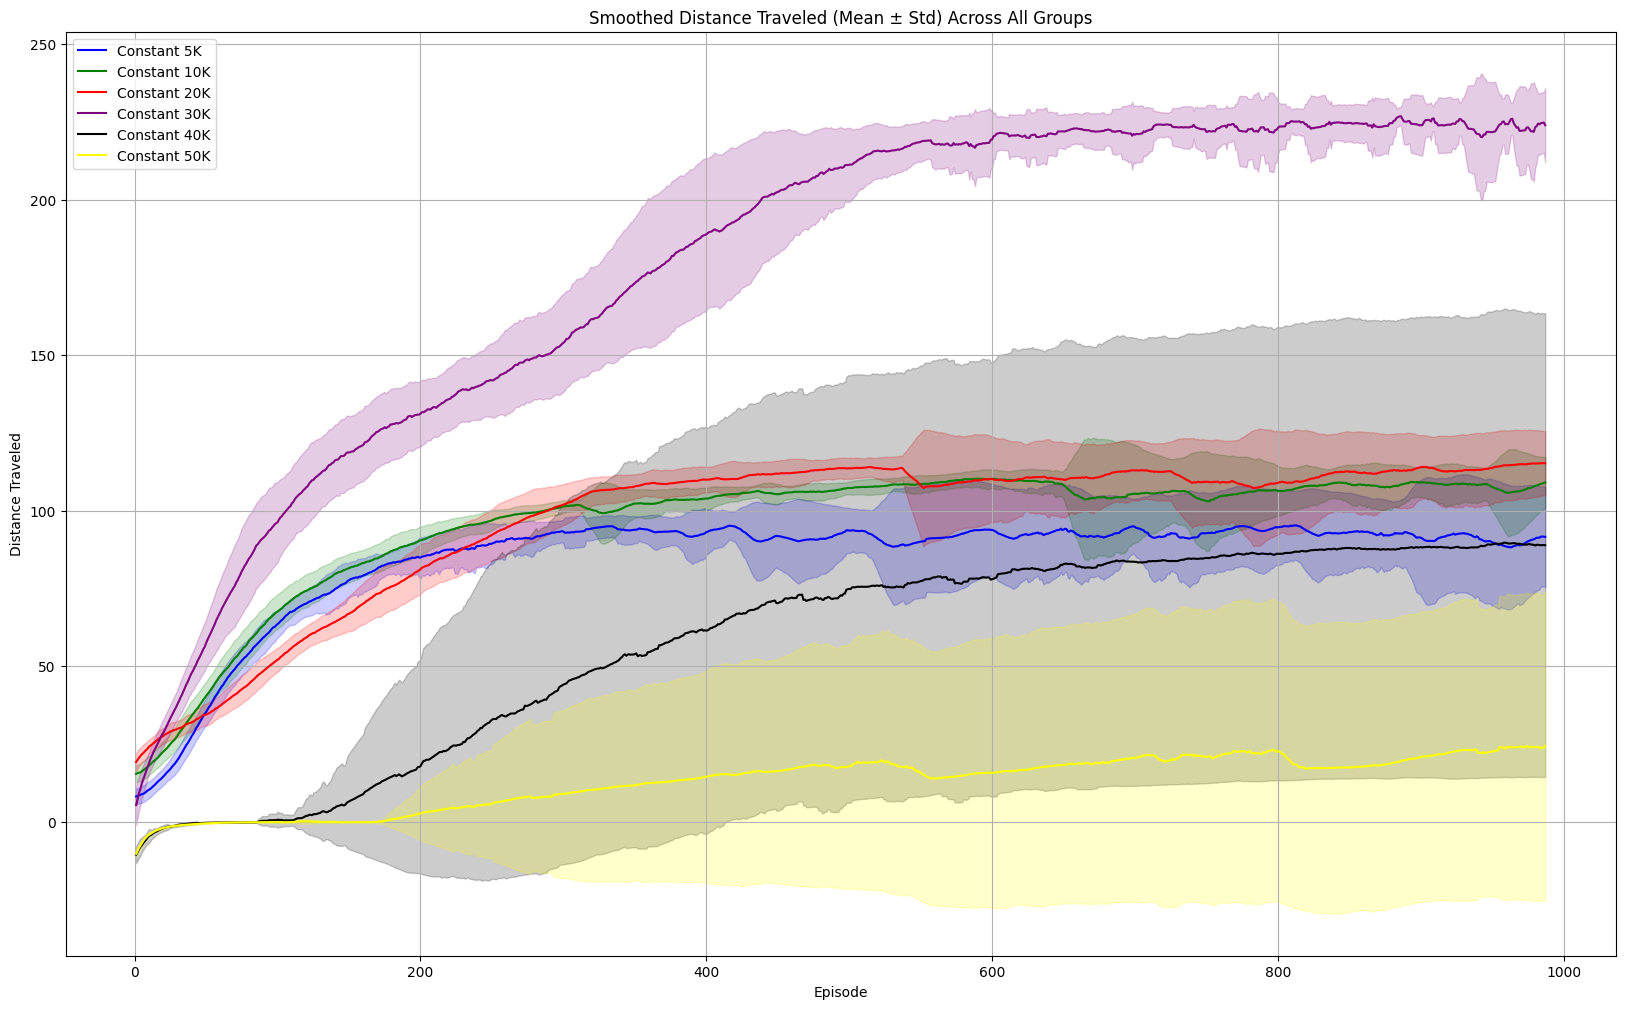

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define your groups: folder name and seed range
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant5k_PPO\distance",
    "Constant 10K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant10k_PPO\distance",
    "Constant 20K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant20k_PPO\distance",
    "Constant 30K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant30k_PPO\distance",
    "Constant 40K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant40k_PPO\distance",
    "Constant 50K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant50k_PPO\distance",
}

# Set corresponding seeds for each group
group_seeds = {
    "Constant 5K": range(100, 110),
    "Constant 10K": range(100, 110),
    "Constant 20K": range(100, 110),
    "Constant 30K": range(100, 110),# Change these based on your seed filenames
    "Constant 40K": range(100, 110),
    "Constant 50K": range(100,110),
}

#
# Colors for plotting
colors = ['blue', 'green', 'red', 'purple', 'black', 'yellow']

# Smoothing window size
window_size = 15

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []
    for seed in seeds:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            data_list.append(np.load(file_path))
        else:
            print(f"Warning: {file_path} not found.")
    
    if data_list:
        group_data = np.array(data_list)
        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        # Apply smoothing
        smoothed_mean = moving_average(group_mean, window_size)
        smoothed_std = moving_average(group_std, window_size)

        # Adjust x-axis to match smoothed data
        episodes = np.arange(1, len(smoothed_mean) + 1)

        plt.plot(episodes, smoothed_mean, label=label, color=colors[idx], linestyle='-')
        plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color=colors[idx], alpha=0.2)
    else:
        print(f"No data loaded for {label}.")

# Final plot formatting
plt.title("Constant tendon (Mean ± Std) Across All Groups")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define your groups: folder name and seed range
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant5k_PPO\distance",
    "Constant 10K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant10k_PPO\distance",
    "Constant 20K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant20k_PPO\distance",
    "Constant 30K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant30k_PPO\distance",
    "Constant 40K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant40k_PPO\distance",
    "Constant 50K": r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\JJ\data\LegEnv_Apr10_constant50k_PPO\distance",
}

# Set corresponding seeds for each group
group_seeds = {
    "Constant 5K": range(100, 110),
    "Constant 10K": range(100, 110),
    "Constant 20K": range(100, 110),
    "Constant 30K": range(100, 110),# Change these based on your seed filenames
    "Constant 40K": range(100, 110),
    "Constant 50K": range(100,110),
}

#
# Colors for plotting
colors = ['blue', 'green', 'red', 'purple', 'black', 'yellow']

# Smoothing window size
window_size = 15

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []
    for seed in seeds:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            data_list.append(np.load(file_path))
        else:
            print(f"Warning: {file_path} not found.")
    
    if data_list:
        group_data = np.array(data_list)
        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        # Apply smoothing
        smoothed_mean = moving_average(group_mean, window_size)
        smoothed_std = moving_average(group_std, window_size)

        # Adjust x-axis to match smoothed data
        episodes = np.arange(1, len(smoothed_mean) + 1)

        plt.plot(episodes, smoothed_mean, label=label, color=colors[idx], linestyle='-')
        plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color=colors[idx], alpha=0.2)
    else:
        print(f"No data loaded for {label}.")

# Final plot formatting
plt.title("Constant tendon (Mean ± Std) Across All Groups")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()

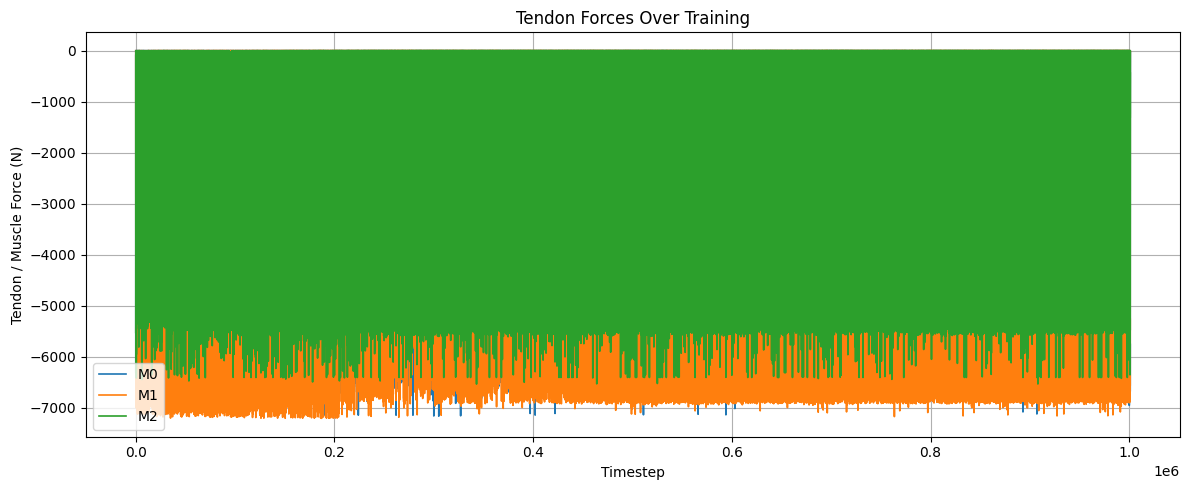

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Update paths based on your folder/seed
folder = r"LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\tendon_forces"
seed = 100
file_path = rf'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\{folder}\tendon_forces_seed_100.npy'

# Load
all_episodes = np.load(file_path, allow_pickle=True)

# Concatenate all timesteps across episodes
forces_over_time = np.concatenate(all_episodes, axis=0)  # shape: (T, 3)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(forces_over_time[:, 0], label="M0", linewidth=1.2)
plt.plot(forces_over_time[:, 1], label="M1", linewidth=1.2)
plt.plot(forces_over_time[:, 2], label="M2", linewidth=1.2)
plt.xlabel("Timestep")
plt.ylabel("Tendon / Muscle Force (N)")
plt.title("Tendon Forces Over Training")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


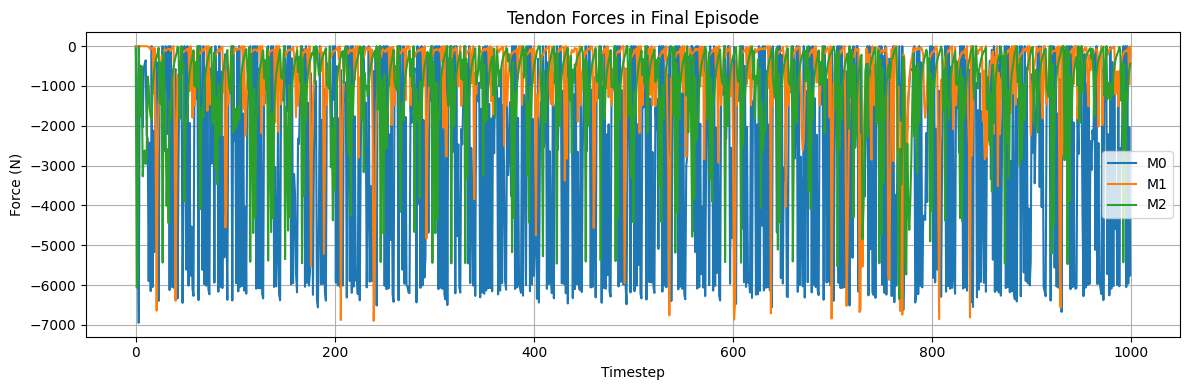

In [14]:
last_ep = np.array(all_episodes[-1])  # shape: (T, 3)

plt.figure(figsize=(12, 4))
plt.plot(last_ep[:, 0], label='M0')
plt.plot(last_ep[:, 1], label='M1')
plt.plot(last_ep[:, 2], label='M2')
plt.title("Tendon Forces in Final Episode")
plt.xlabel("Timestep")
plt.ylabel("Force (N)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


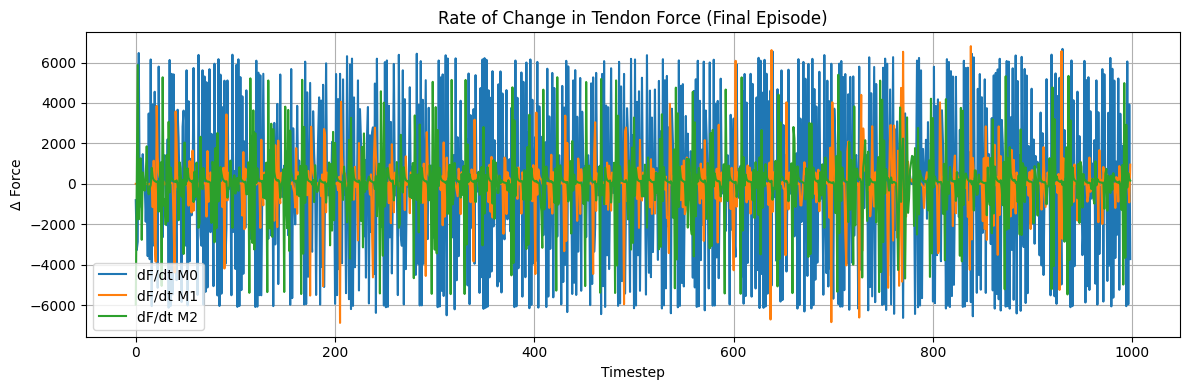

In [15]:
force_rate = np.diff(last_ep, axis=0)  # shape: (T-1, 3)

plt.figure(figsize=(12, 4))
plt.plot(force_rate[:, 0], label='dF/dt M0')
plt.plot(force_rate[:, 1], label='dF/dt M1')
plt.plot(force_rate[:, 2], label='dF/dt M2')
plt.title("Rate of Change in Tendon Force (Final Episode)")
plt.xlabel("Timestep")
plt.ylabel("Δ Force")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


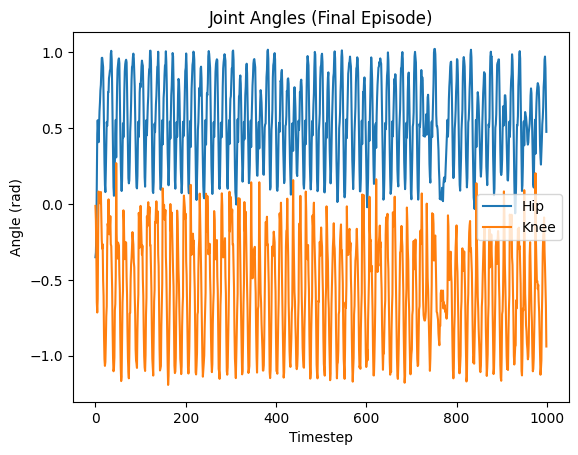

In [26]:
# Load
folder = r"LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics"
qpos = np.load(fr'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics\qpos_seed_100.npy', allow_pickle=True)
qvel = np.load(fr'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics\qvel_seed_100.npy', allow_pickle=True)

# Example: Final episode, hip and knee angles
last_qpos = np.array(qpos[-1])  # shape (T, dof)
last_qvel = np.array(qvel[-1])

plt.plot(last_qpos[:, 1], label="Hip")
plt.plot(last_qpos[:, 2], label="Knee")
plt.title("Joint Angles (Final Episode)")
plt.xlabel("Timestep")
plt.ylabel("Angle (rad)")
plt.legend()
plt.show()


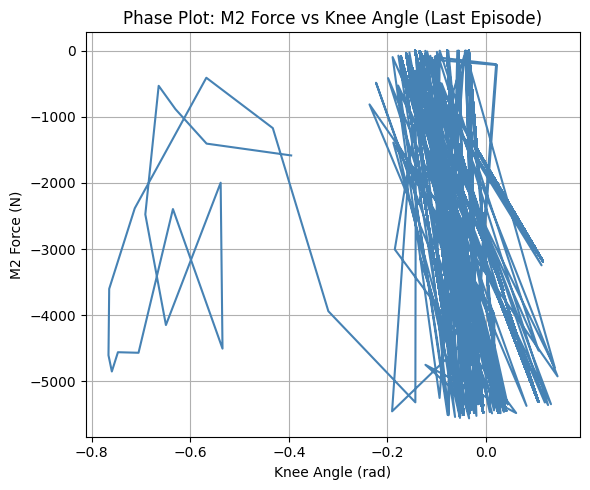

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Load data (adjust paths if needed)
folder = r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant30k_constant30kOnly_constant_5e-04_PPO"
seed = 102
force_path = fr'{folder}/tendon_forces/tendon_forces_seed_{seed}.npy'
qpos_path = fr'{folder}/kinematics/qpos_seed_{seed}.npy'

# Load arrays
force_data = np.load(force_path, allow_pickle=True)
qpos_data = np.load(qpos_path, allow_pickle=True)

# Extract last episode
last_forces = np.array(force_data[-1])  # shape (T, 3)
last_qpos = np.array(qpos_data[-1])     # shape (T, dof)

# Choose muscle and joint:
# M2 = index 2
# Knee = qpos[:, 2] if 0=rootx, 1=hip, 2=knee
m2_force = last_forces[:, 2]
knee_angle = last_qpos[:, 2]

# Phase plot
plt.figure(figsize=(6, 5))
plt.plot(knee_angle, m2_force, color="steelblue", linewidth=1.5)
plt.xlabel("Knee Angle (rad)")
plt.ylabel("M2 Force (N)")
plt.title("Phase Plot: M2 Force vs Knee Angle (Last Episode)")
plt.grid(True)
plt.tight_layout()
plt.show()



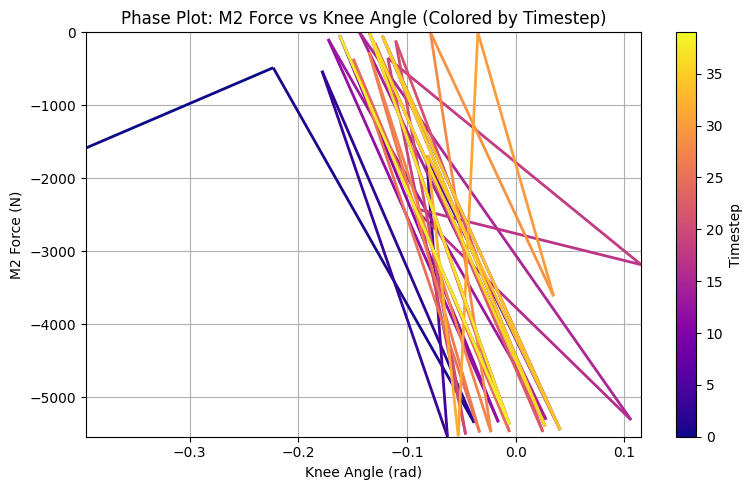

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Extract data from last episode
knee_angle = last_qpos[::25, 2]      # assuming index 2 is the knee
m2_force = last_forces[::25, 2]      # muscle 2 force

# Build segments for colored line plotting
points = np.array([knee_angle, m2_force]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize color by time
norm = plt.Normalize(0, len(knee_angle) - 1)

# Create line collection
lc = LineCollection(segments, cmap='plasma', norm=norm)
lc.set_array(np.arange(len(knee_angle) - 1))
lc.set_linewidth(2)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
line = ax.add_collection(lc)
ax.set_xlim(knee_angle.min(), knee_angle.max())
ax.set_ylim(m2_force.min(), m2_force.max())
plt.xlabel("Knee Angle (rad)")
plt.ylabel("M2 Force (N)")
plt.title("Phase Plot: M2 Force vs Knee Angle (Colored by Timestep)")
cbar = plt.colorbar(line, ax=ax)
cbar.set_label("Timestep")
plt.grid(True)
plt.tight_layout()
plt.show()


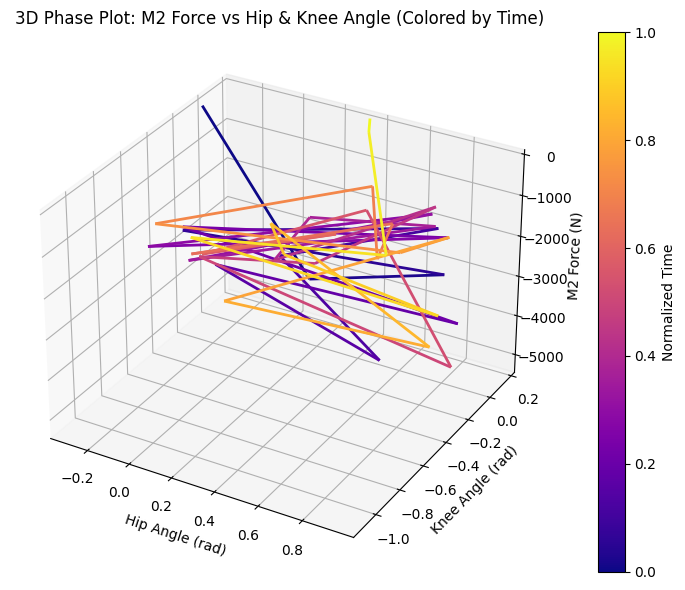

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

# Downsample
step = 25
hip_angle = last_qpos[::step, 1]
knee_angle = last_qpos[::step, 2]
m2_force = last_forces[::step, 2]

# Prepare segments for line collection
points = np.array([hip_angle, knee_angle, m2_force]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create color map based on time
time_steps = np.linspace(0, 1, len(segments))  # normalized time
colors = cm.plasma(time_steps)  # or use 'viridis', 'inferno', etc.

# Create 3D line collection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

line_collection = Line3DCollection(segments, colors=colors, linewidth=2)
ax.add_collection3d(line_collection)

# Set axis limits
ax.set_xlim(hip_angle.min(), hip_angle.max())
ax.set_ylim(knee_angle.min(), knee_angle.max())
ax.set_zlim(m2_force.min(), m2_force.max())

ax.set_xlabel("Hip Angle (rad)")
ax.set_ylabel("Knee Angle (rad)")
ax.set_zlabel("M2 Force (N)")
ax.set_title("3D Phase Plot: M2 Force vs Hip & Knee Angle (Colored by Time)")

# Add colorbar
mappable = cm.ScalarMappable(cmap='plasma')
mappable.set_array(time_steps)
fig.colorbar(mappable, ax=ax, label="Normalized Time")

plt.tight_layout()
plt.show()


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

# Load data (adjust paths if needed)
folder = r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant30k_constant30kOnly_constant_5e-04_PPO"
seed = 102
force_path = fr'{folder}/tendon_forces/tendon_forces_seed_{seed}.npy'
qpos_path = fr'{folder}/kinematics/qpos_seed_{seed}.npy'


qpos_data = np.load(qpos_path, allow_pickle=True)
last_qpos = np.array(qpos_data[-1])     # shape (T, dof)

# Downsample data
step = 1
hip_angles =np.degrees(last_qpos[::step, 1])
knee_angles = last_qpos[::step, 2]

# Create line segments from (hip, knee) points
points = np.array([hip_angles, knee_angles]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize time for color mapping
time_steps = np.linspace(0, 1, len(segments))
colors = cm.plasma(time_steps)

# Create line collection for colored path
lc = LineCollection(segments, colors=colors, linewidth=2)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc)
ax.set_xlim(np.min(hip_angles), np.max(hip_angles))
ax.set_ylim(np.min(knee_angles), np.max(knee_angles))
ax.set_xlabel("Hip Angle (rad)")
ax.set_ylabel("Knee Angle (rad)")
ax.set_title("Angle-Angle Plot: Hip vs Knee (Colored by Time)")

# Colorbar
mappable = cm.ScalarMappable(cmap='plasma')
mappable.set_array(time_steps)
fig.colorbar(mappable, ax=ax, label="Normalized Time")

plt.tight_layout()
plt.show()


TypeError: loop of ufunc does not support argument 0 of type float which has no callable degrees method

In [74]:
print(np.shape(qpos_data))

(1001, 1000, 3)


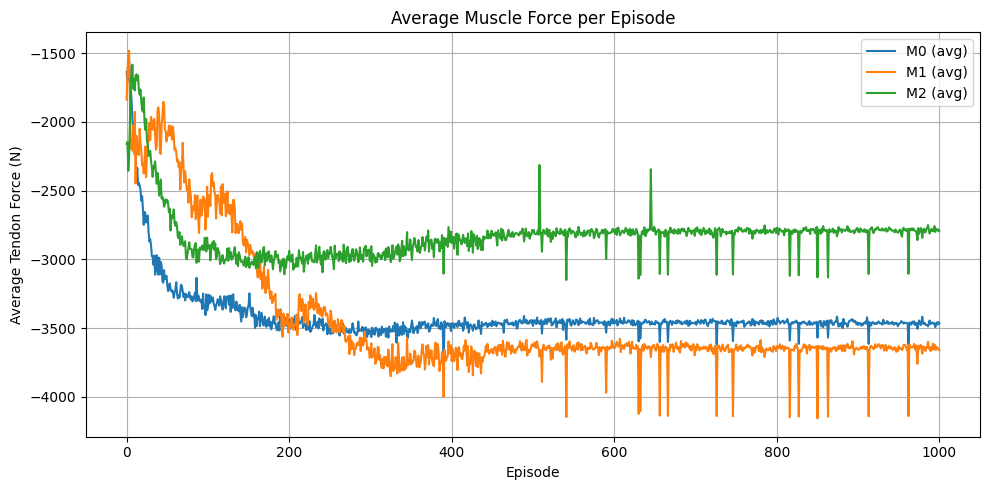

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Load previously saved tendon forces
folder = r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant30k_constant30kOnly_constant_5e-04_PPO"
seed = 100
force_path = fr'{folder}/tendon_forces/tendon_forces_seed_{seed}.npy'
episodes = np.load(force_path, allow_pickle=True)

# Compute average force per episode
episode_means = np.array([
    np.mean(np.array(ep), axis=0) for ep in episodes  # shape: (num_episodes, 3)
])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(episode_means[:, 0], label='M0 (avg)')
plt.plot(episode_means[:, 1], label='M1 (avg)')
plt.plot(episode_means[:, 2], label='M2 (avg)')

plt.xlabel("Episode")
plt.ylabel("Average Tendon Force (N)")
plt.title("Average Muscle Force per Episode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


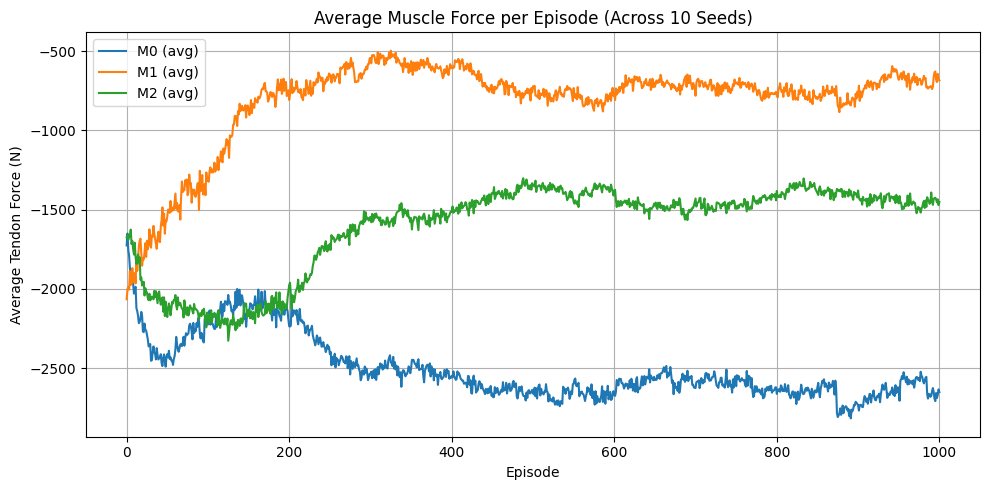

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os
folder = r"C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO"

seed_range = range(100, 103)
force_series = []

# Load and process each seed
for seed in seed_range:
    path = f'{folder}/tendon_forces/tendon_forces_seed_{seed}.npy'
    if not os.path.exists(path):
        print(f"❌ Missing seed {seed}, skipping.")
        continue
    episodes = np.load(path, allow_pickle=True)
    episode_means = np.array([np.mean(np.array(ep), axis=0) for ep in episodes])  # shape: (E, 3)
    force_series.append(episode_means)

# Align all to same episode count
min_episodes = min(fs.shape[0] for fs in force_series)
force_series = [fs[:min_episodes] for fs in force_series]

# Compute average across seeds: shape (min_episodes, 3)
avg_forces = np.mean(np.array(force_series), axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_forces[:, 0], label='M0 (avg)')
plt.plot(avg_forces[:, 1], label='M1 (avg)')
plt.plot(avg_forces[:, 2], label='M2 (avg)')

plt.xlabel("Episode")
plt.ylabel("Average Tendon Force (N)")
plt.title("Average Muscle Force per Episode (Across 10 Seeds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
